# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [2]:
df_train = pd.read_csv('Data_Train.csv',encoding= 'unicode_escape')
df_test = pd.read_csv('Data_Test.csv',encoding= 'unicode_escape')

In [3]:
df_train.shape

(12690, 9)

In [4]:
df_test.shape

(4231, 8)

In [5]:
df_train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [6]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


### Imputing Missing Values with Medians

In [7]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [8]:
df_train['CITY'].value_counts()

Chennai                                        2174
Bangalore                                      2149
Hyderabad                                      1819
Mumbai                                         1722
New Delhi                                      1321
                                               ... 
Maharaja Hotel Beside Gardania Bar                1
Khar Mumbai                                       1
682035.                                           1
Chennai - 34 Landmark - Near Loyola College       1
Begumpet Hyderabad                                1
Name: CITY, Length: 359, dtype: int64

In [9]:
df_train['LOCALITY'].value_counts()

Gachibowli                               166
Indiranagar                              138
Edappally                                122
Kakkanad                                 121
HSR                                      120
                                        ... 
Behind State Bank Of India Kavi Nagar      1
India Gate                                 1
DG 01                                      1
Palam Vihar                                1
Satellite Town                             1
Name: LOCALITY, Length: 1416, dtype: int64

In [10]:
df_train['VOTES'].value_counts()

44 votes      71
29 votes      66
28 votes      66
38 votes      65
35 votes      64
              ..
3765 votes     1
2577 votes     1
1434 votes     1
2837 votes     1
2143 votes     1
Name: VOTES, Length: 1847, dtype: int64

In [15]:
df_train['CITY']=df_train.CITY.transform(lambda x: x.fillna('Chennai'))
df_train['LOCALITY']=df_train.LOCALITY.transform(lambda x: x.fillna('Gachibowli'))
df_train['VOTES']=df_train.VOTES.transform(lambda x: x.fillna('44 votes'))
df_train['RATING']=df_train.RATING.transform(lambda x: x.fillna('5'))

In [16]:
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [17]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

# 3. Exploratory Data Analysis Data Visualization

[Text(0, 0, 'CASUAL DINING'),
 Text(0, 0, 'CASUAL DINING,BAR'),
 Text(0, 0, 'QUICK BITES'),
 Text(0, 0, 'DESSERT PARLOR'),
 Text(0, 0, 'CAFÉ'),
 Text(0, 0, 'MICROBREWERY'),
 Text(0, 0, 'QUICK BITES,BEVERAGE SHOP'),
 Text(0, 0, 'CASUAL DINING,IRANI CAFE'),
 Text(0, 0, 'BAKERY,QUICK BITES'),
 Text(0, 0, 'None'),
 Text(0, 0, 'BAR,CASUAL DINING'),
 Text(0, 0, 'BAR'),
 Text(0, 0, 'PUB'),
 Text(0, 0, 'BEVERAGE SHOP'),
 Text(0, 0, 'FINE DINING'),
 Text(0, 0, 'CAFÉ,QUICK BITES'),
 Text(0, 0, 'BEVERAGE SHOP,DESSERT PARLOR'),
 Text(0, 0, 'SWEET SHOP,QUICK BITES'),
 Text(0, 0, 'DESSERT PARLOR,SWEET SHOP'),
 Text(0, 0, 'BAKERY'),
 Text(0, 0, 'BAKERY,DESSERT PARLOR'),
 Text(0, 0, 'BAR,LOUNGE'),
 Text(0, 0, 'FOOD COURT'),
 Text(0, 0, 'LOUNGE'),
 Text(0, 0, 'DESSERT PARLOR,BEVERAGE SHOP'),
 Text(0, 0, 'LOUNGE,CASUAL DINING'),
 Text(0, 0, 'FOOD TRUCK'),
 Text(0, 0, 'QUICK BITES,FOOD COURT'),
 Text(0, 0, 'SWEET SHOP'),
 Text(0, 0, 'BEVERAGE SHOP,FOOD COURT'),
 Text(0, 0, 'PUB,CASUAL DINING'),
 Text(0, 

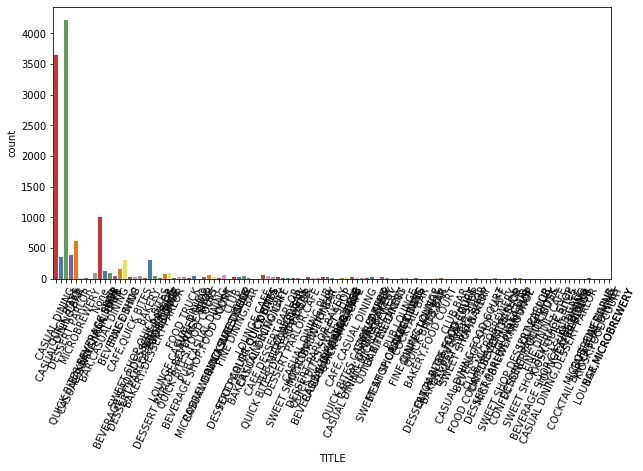

In [20]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_train,
    x='TITLE',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

[Text(0, 0, 'Thane'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Gurgaon'),
 Text(0, 0, 'Hyderabad'),
 Text(0, 0, 'Kochi'),
 Text(0, 0, 'Thane West'),
 Text(0, 0, 'Andheri Lokhandwala'),
 Text(0, 0, 'New Delhi'),
 Text(0, 0, 'Andheri West'),
 Text(0, 0, 'Malad East'),
 Text(0, 0, '682036'),
 Text(0, 0, 'Bangalor'),
 Text(0, 0, 'Navi Mumbai'),
 Text(0, 0, 'Bandra West'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Noida'),
 Text(0, 0, 'Bangalore-560066'),
 Text(0, 0, 'Secunderabad'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Madhuranagar'),
 Text(0, 0, 'Chennai Teynampet'),
 Text(0, 0, 'Faridabad'),
 Text(0, 0, 'Chembur.'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'opp gurudwara Shakurpur'),
 Text(0, 0, 'Telagana Land Line:040-48507016'),
 Text(0, 0, 'Ghaziabad'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Edappally'),
 Text(0, 0, 'Kadavanthra'),
 Text(0, 0, 'Ernakulam Circle kochi'),
 Text(0, 0, 'Bengalore'),
 Text(0, 0, 'Near Reliance Fresh

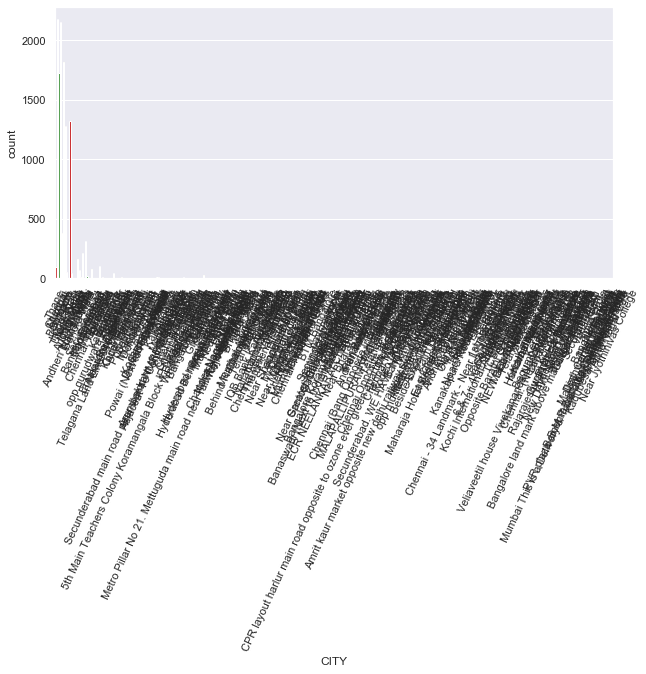

In [23]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_train,
    x='CITY',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

# 4. Data pre-processing and cleaning

## B.Converting all features to numerical features 

In [18]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['TITLE']= label_encoder.fit_transform(df_train['TITLE']) 
df_train['CUISINES']= label_encoder.fit_transform(df_train['CUISINES']) 
df_train['TIME']= label_encoder.fit_transform(df_train['TIME']) 
df_train['CITY']= label_encoder.fit_transform(df_train['CITY']) 
df_train['LOCALITY']= label_encoder.fit_transform(df_train['LOCALITY']) 
df_train['RATING']= label_encoder.fit_transform(df_train['RATING']) 
df_train['VOTES']= label_encoder.fit_transform(df_train['VOTES']) 


## C.Removing Unwanted columns

## D.Removing outliers using standard methods

In [21]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df_train))
print(np.where(z>3))
df_train=df_train[(z<3).all(axis=1)]

(array([   84,   208,   308,   337,   379,   422,   469,   502,   563,
         731,   839,   966,   967,   973,  1133,  1193,  1288,  1345,
        1395,  1470,  1475,  1594,  1632,  1657,  1759,  1778,  1828,
        1878,  1884,  1916,  1930,  1931,  2100,  2111,  2205,  2207,
        2333,  2339,  2349,  2369,  2459,  2488,  2531,  2604,  2610,
        2622,  2683,  2686,  2689,  2695,  2740,  2940,  2973,  3002,
        3036,  3049,  3197,  3211,  3309,  3338,  3396,  3492,  3526,
        3532,  3554,  3603,  3688,  3692,  3704,  3715,  3730,  3773,
        3847,  3891,  3896,  3905,  3942,  3953,  3962,  4147,  4152,
        4224,  4273,  4279,  4285,  4298,  4323,  4494,  4524,  4554,
        4558,  4659,  4693,  4708,  4728,  4904,  4931,  5098,  5108,
        5133,  5173,  5202,  5264,  5588,  5841,  5843,  5874,  5934,
        5944,  5975,  6024,  6136,  6147,  6343,  6475,  6505,  6640,
        6644,  6804,  6949,  6997,  7034,  7073,  7078,  7275,  7316,
        7362,  7369

### E .Train_test Split

In [22]:
y=df_train['COST']
x=df_train.drop(['COST'],axis=1)

In [23]:
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12466, dtype: int64

In [24]:
X_train, X_cv, y_train, y_cv = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
X_test=df_test

In [26]:
round(X_train, 2)
round(X_cv, 2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
10185,87,14796,3842,615,67,1275,12,950
6990,31,4467,1255,1168,222,717,23,447
2346,31,11139,1403,894,131,466,32,1202
10162,50,15569,2255,625,131,566,20,764
10155,31,6103,1270,906,222,750,15,181
...,...,...,...,...,...,...,...,...
7044,60,13200,2993,2047,222,247,21,927
1236,31,9173,600,219,131,760,15,1502
1791,87,14902,366,2492,67,342,32,1202
6309,67,9155,1796,555,317,418,22,1418


In [27]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
X_train = feature_scaler.fit_transform(X_train)
X_cv = feature_scaler.transform(X_cv)

In [28]:
X_cv.shape

(4114, 8)

In [42]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_cv = feature_scaler.transform(X_cv)


# 5. Building Models

# Model1 : KNN

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
clf.best_params_

{'n_neighbors': 21}

In [45]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=21)
neigh.fit(X_train, y_train)

y_cv_pred = neigh.predict(X_cv)
print(r2_score(y_cv,y_cv_pred))


0.2800944933011519


# Model 3 : Linear regression 

In [46]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_cv_pred = Lr.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.11751664302403697


In [162]:
y_test_pred = Lr.predict(X_test)

In [163]:
y_test_pred

array([14462.23713753, 10355.55584762,  9821.25072297, ...,
       12292.41081024, 10650.79631801, 10539.59549315])

# Model 4 : SVM

In [47]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.509179750145716


In [48]:
model.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in tqdm(C):
    #
    svm = SVR(C=k,gamma= 1,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

100%|██████████| 5/5 [02:02<00:00, 24.43s/it]


[-0.020510679662125497, -0.020446511974758174, -0.015505382366291509, 0.079773651314705, 0.1524508933173802]


In [66]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

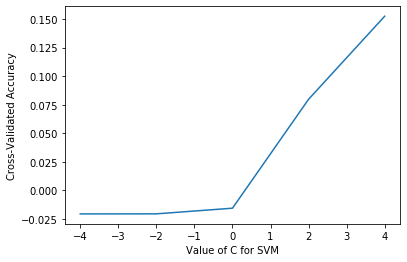

In [67]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [49]:
from sklearn.svm import SVR

clf = SVR(C=1000,gamma=1,kernel= 'rbf')

clf.fit(X_train, y_train)

y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.23640427399304398


# Model 5 : Decision Tree

In [50]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.2671154750695782


In [51]:
model.best_params_

{'max_depth': 5}

In [52]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.07998077518716087, 0.23181267462643226, 0.2068065325203457, 0.2037497045196453, 0.20537324445136446]


Text(0, 0.5, 'Cross-Validated Accuracy')

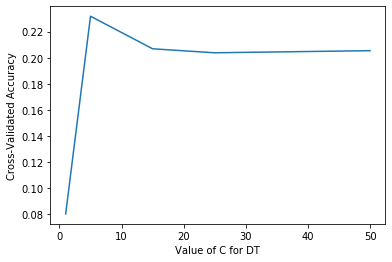

In [53]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [54]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion='mse',max_depth=5,min_samples_split=2)

clf.fit(X_train, y_train)


y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.23877174108299137


# Model 6 : Ensemble Techniques 

## A. Bagging

In [55]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9092951705378559


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=100,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_cv_pred = RF.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.35622948738032945


# Boosting

In [57]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=5,n_estimators=100)
clf.fit(X_train, y_train)

y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.315583595018171


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [59]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

y_cv_pred = xgb_model.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))



[17:11:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.29212560713880653


# 6.Model Comparison

In [60]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.2800' ])
table.add_row(["Linear Regression" ,'0.1175' ])
table.add_row(["SVM", '0.2364' ])
table.add_row(["Decision Tree",'0.2387' ])
table.add_row(["RandomForest",'0.3562' ])
table.add_row(["GBDT" ,'0.3155' ])
table.add_row(["Xgboost",'0.2921' ])

print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.2800  |
| Linear Regression |  0.1175  |
|        SVM        |  0.2364  |
|   Decision Tree   |  0.2387  |
|    RandomForest   |  0.3562  |
|        GBDT       |  0.3155  |
|      Xgboost      |  0.2921  |
+-------------------+----------+


Summary:<br>
1.RF is the best model amongst all with r2score  of 0.8390<br>

# 7.Creating Submission File

In [61]:
best_model=RF
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']